In [1]:
from utility import *
seed = 22

# GPUs Available:  1


In [2]:
#load the data
data_size = 1000
X_train, Y_train, X_validation, Y_validation, X_test = load_data(data_size)

# defining the parameters

batch_size = 32
epochs = 1000
# steps_per_epoch = sum(train_occurences) / batch_size
starter_learning_rate = 1e-1
end_learning_rate = 1e-8
decay_steps = epochs * 3
# loss = tf.keras.losses.MeanAbsoluteError
# loss = tf.keras.losses.MeanSquaredError
metrics = tf.keras.metrics.MeanSquaredError()
scheduler = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate= starter_learning_rate,
    decay_steps= decay_steps,
    end_learning_rate= end_learning_rate,
    power=1)
# scheduler = 0.01
# optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler)
kernel_regularizer=tf.keras.regularizers.L1L2(0.01)
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error',patience=20)]
initializer=tf.keras.initializers.HeUniform(seed = seed)

verbose=2

# generating augmented data
X_train_Aug, Y_train_Aug = data_augmentation(X_train, Y_train)

1000 rowed data loaded


In [3]:
class EqHidden_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(EqHidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.a = self.add_weight(name = 'a',shape=(1,), initializer=tf.keras.initializers.HeUniform(seed = seed),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.b = self.add_weight(name = 'b',shape=(1,), initializer=tf.keras.initializers.HeUniform(seed = seed),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.c = self.add_weight(name = 'c',shape=(1,), initializer=tf.keras.initializers.HeUniform(seed = seed),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.a_matrix = tf.constant([[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,1]], dtype=tf.float64)
        self.b_matrix = tf.constant([[0,1,0,1], [1,0,1,0], [0,1,0,1],[1,0,1,0]], dtype=tf.float64)
        self.c_matrix = tf.constant([[0,0,1,0], [0,0,0,1], [1,0,0,0],[0,1,0,0]], dtype=tf.float64)
    
    def call(self, inputs):
        self.W = tf.multiply(self.a, self.a_matrix) + tf.multiply(self.b, self.b_matrix) + tf.multiply(self.c, self.c_matrix)
        x = tf.keras.activations.relu(tf.matmul(inputs, self.W))
        # tf.print(self.W)
        return x
    def get_config(self):
        config = super(EqHidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

class EqOutput_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(EqOutput_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.d = self.add_weight(name = 'd',shape=(1,), initializer=tf.keras.initializers.HeUniform(seed = seed),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.d_matrix = tf.constant([[1,-1], [-1,-1], [-1,1],[1,1]], dtype=tf.float64)

    def call(self, inputs):
        self.W = tf.multiply(self.d, self.d_matrix)
        x = tf.matmul(inputs, self.W)
        # tf.print(tf.transpose(self.W))
        return tf.keras.activations.tanh(x)
    def get_config(self):
        config = super(EqOutput_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config

    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

In [4]:
# Equivariant NN Model
class EqNNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(EqHidden_layer(4))
        model.add(EqOutput_layer(2))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = tf.keras.losses.MeanAbsoluteError(),
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/1000
32/32 - 1s - loss: 0.3945 - mean_squared_error: 0.2141 - val_loss: 0.2050 - val_mean_squared_error: 0.0383 - 1s/epoch - 46ms/step
Epoch 2/1000
32/32 - 0s - loss: 0.1660 - mean_squared_error: 0.0275 - val_loss: 0.1321 - val_mean_squared_error: 0.0192 - 134ms/epoch - 4ms/step
Epoch 3/1000
32/32 - 0s - loss: 0.1550 - mean_squared_error: 0.0239 - val_loss: 0.1320 - val_mean_squared_error: 0.0161 - 115ms/epoch - 4ms/step
Epoch 4/1000
32/32 - 0s - loss: 0.1552 - mean_squared_error: 0.0244 - val_loss: 0.1262 - val_mean_squared_error: 0.0157 - 121ms/epoch - 4ms/step
Epoch 5/1000
32/32 - 0s - loss: 0.1540 - mean_squared_error: 0.0233 - val_loss: 0.1256 - val_mean_squared_error: 0.0151 - 115ms/epoch - 4ms/step
Epoch 6/1000
32/32 - 0s - loss: 0.1527 - mean_squared_error: 0.0232 - val_loss: 0.1260 - val_mean_squared_error: 0.0156 - 118ms/epoch - 4ms/step
Epoch 7/1000
32/32 - 0s - loss: 0.1530 - mean_squared_error: 0.0230 - val_loss: 0.1256 - val_mean_squared_error: 0.0152 - 186ms/epoc

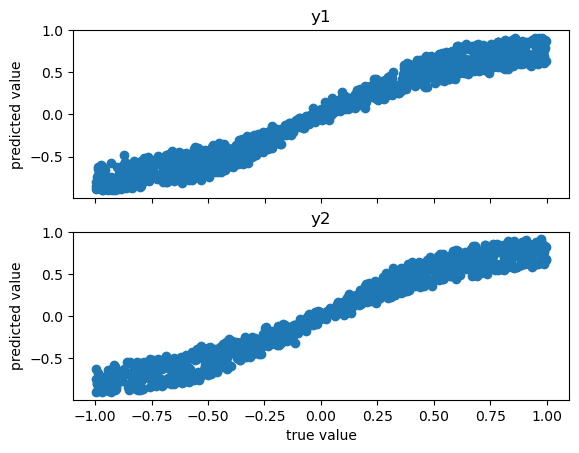

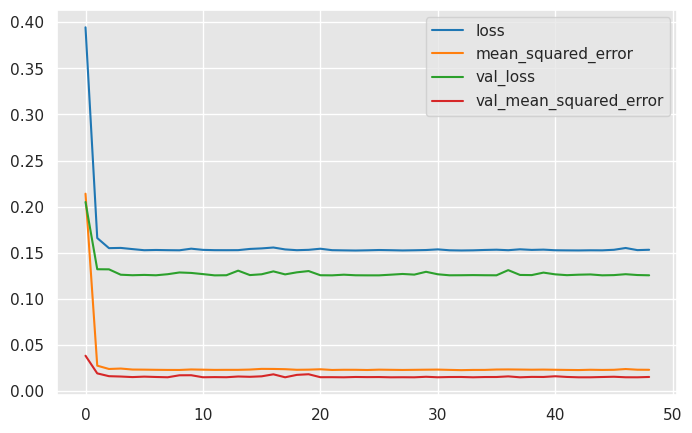

1/1 [==============================] - 0s 19ms/step
[[ 0.00000000e+00  1.11022302e-16]
 [-3.94160233e-01  3.94160233e-01]
 [-3.94160233e-01 -3.94160233e-01]
 [ 3.94160233e-01 -3.94160233e-01]
 [ 3.94160233e-01  3.94160233e-01]
 [-5.54650953e-01  5.54650953e-01]
 [ 5.54650953e-01 -5.54650953e-01]
 [-6.09683335e-01  6.09683335e-01]
 [ 5.54650953e-01 -5.54650953e-01]
 [-5.54650953e-01 -5.54650953e-01]]


In [5]:
# Model 3 Equivariant NN - on Normal data
Eqmodel = EqNNmodel.model()
history = Eqmodel.fit(X_train, Y_train,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(Eqmodel, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)

if data_size==100:
    Eqmodel.save('./models/ENN_100_normal.h5')
else:
    Eqmodel.save('./models/ENN_1000_normal.h5')

32/32 [==============================] - 0s 960us/step
rmse of y1:  0.12697014851322974
rmse of y2:  0.12004024893681654
1/1 [==============================] - 0s 14ms/step
[[ 0.00000000e+00  1.11022302e-16]
 [-3.94160233e-01  3.94160233e-01]
 [-3.94160233e-01 -3.94160233e-01]
 [ 3.94160233e-01 -3.94160233e-01]
 [ 3.94160233e-01  3.94160233e-01]
 [-5.54650953e-01  5.54650953e-01]
 [ 5.54650953e-01 -5.54650953e-01]
 [-6.09683335e-01  6.09683335e-01]
 [ 5.54650953e-01 -5.54650953e-01]
 [-5.54650953e-01 -5.54650953e-01]]


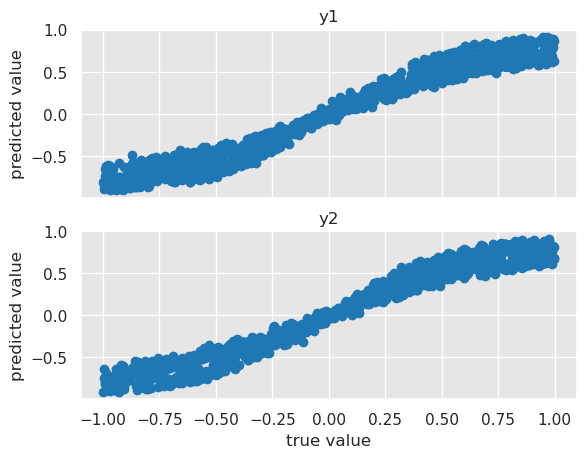

In [6]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       if data_size==100:
              load_model = tf.keras.models.load_model('./models/ENN_100_normal.h5')
       else:
              load_model = tf.keras.models.load_model('./models/ENN_1000_normal.h5')
       
model_eval_low(load_model, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)

Epoch 1/1000
250/250 - 1s - loss: 0.1828 - mean_squared_error: 0.0460 - val_loss: 0.1257 - val_mean_squared_error: 0.0153 - 863ms/epoch - 3ms/step
Epoch 2/1000
250/250 - 0s - loss: 0.1534 - mean_squared_error: 0.0232 - val_loss: 0.1256 - val_mean_squared_error: 0.0151 - 473ms/epoch - 2ms/step
Epoch 3/1000
250/250 - 0s - loss: 0.1528 - mean_squared_error: 0.0230 - val_loss: 0.1261 - val_mean_squared_error: 0.0149 - 459ms/epoch - 2ms/step
Epoch 4/1000
250/250 - 0s - loss: 0.1530 - mean_squared_error: 0.0231 - val_loss: 0.1307 - val_mean_squared_error: 0.0158 - 448ms/epoch - 2ms/step
Epoch 5/1000
250/250 - 1s - loss: 0.1534 - mean_squared_error: 0.0231 - val_loss: 0.1259 - val_mean_squared_error: 0.0156 - 520ms/epoch - 2ms/step
Epoch 6/1000
250/250 - 0s - loss: 0.1530 - mean_squared_error: 0.0230 - val_loss: 0.1294 - val_mean_squared_error: 0.0155 - 473ms/epoch - 2ms/step
Epoch 7/1000
250/250 - 1s - loss: 0.1529 - mean_squared_error: 0.0231 - val_loss: 0.1266 - val_mean_squared_error: 0.0

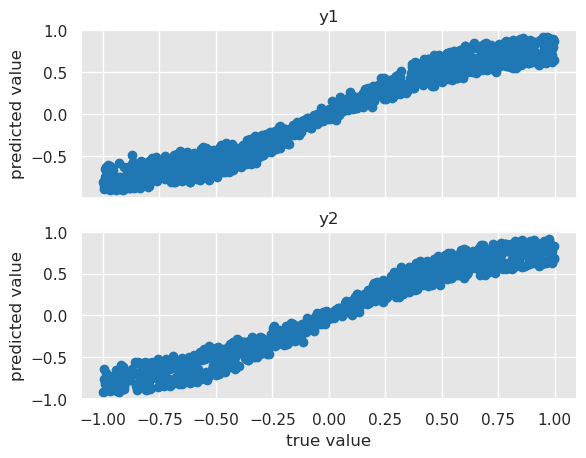

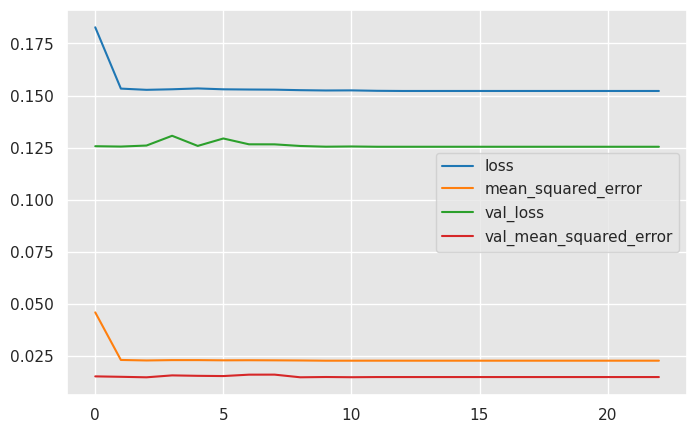

1/1 [==============================] - 0s 16ms/step
[[ 0.          0.        ]
 [-0.40207157  0.40207157]
 [-0.40207157 -0.40207157]
 [ 0.40207157 -0.40207157]
 [ 0.40207157  0.40207157]
 [-0.56433844  0.56433844]
 [ 0.56433844 -0.56433844]
 [-0.61962725  0.61962725]
 [ 0.56433844 -0.56433844]
 [-0.56433844 -0.56433844]]


In [7]:
# Model 4 Equivariant NN - on Augmented data
Eqmodel = EqNNmodel.model()
history = Eqmodel.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(Eqmodel, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)

if data_size==100:
    Eqmodel.save('./models/ENN_100_Aug.h5')
else:
    Eqmodel.save('./models/ENN_1000_Aug.h5')

32/32 [==============================] - 0s 881us/step
rmse of y1:  0.1260226406712205
rmse of y2:  0.11900319035583917
1/1 [==============================] - 0s 15ms/step
[[ 0.          0.        ]
 [-0.40207157  0.40207157]
 [-0.40207157 -0.40207157]
 [ 0.40207157 -0.40207157]
 [ 0.40207157  0.40207157]
 [-0.56433844  0.56433844]
 [ 0.56433844 -0.56433844]
 [-0.61962725  0.61962725]
 [ 0.56433844 -0.56433844]
 [-0.56433844 -0.56433844]]


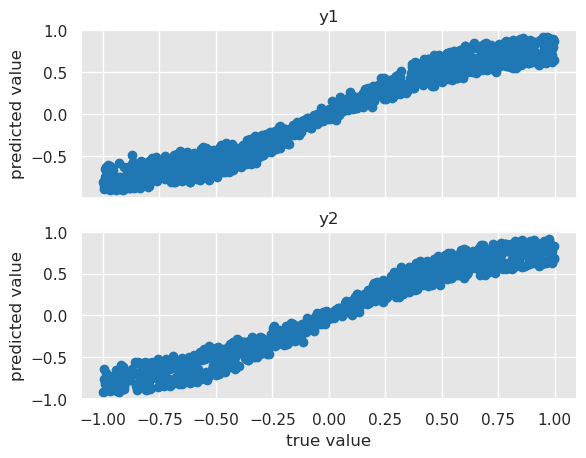

In [8]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       if data_size==100:
              load_model = tf.keras.models.load_model('./models/ENN_100_Aug.h5')
       else:
              load_model = tf.keras.models.load_model('./models/ENN_1000_Aug.h5')
       
model_eval_low(load_model, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)